In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp

In [2]:
np.random.seed(42)

In [3]:
y_true=np.random.randint(0,2,size=5)

In [4]:
y_true

array([0, 1, 0, 0, 0])

In [5]:
y_pred=np.ones(5,dtype=np.int32)
y_pred

array([1, 1, 1, 1, 1])

In [6]:
np.sum(y_true==y_pred)/len(y_true)

0.2

In [7]:
from sklearn import metrics
metrics.accuracy_score(y_true,y_pred)

0.2

In [9]:
truly_a_positive=(y_true==1)
predicted_a_positive=(y_pred==1)
true_positive=np.sum(predicted_a_positive*truly_a_positive)
true_positive

1

In [11]:
false_positive=np.sum((y_pred==1)*(y_true==0))
false_positive

4

In [12]:
metrics.precision_score(y_true,y_pred)

0.2

In [13]:
x=np.linspace(0,10,100)

In [14]:
y_true=np.sin(x)+np.random.rand(x.size)-0.5


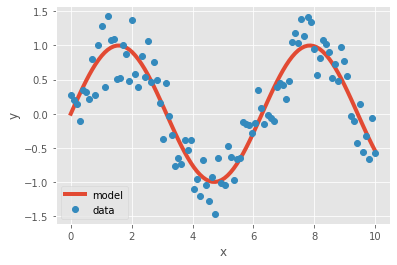

In [16]:
y_pred=np.sin(x)
plt.style.use('ggplot')
plt.plot(x,y_pred,linewidth=4,label="model")
plt.plot(x,y_true,'o',label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="lower left")

In [17]:
mse=np.mean((y_true-y_pred)**2)

In [18]:
mse

0.08531839480842378

In [19]:
metrics.mean_squared_error(y_true,y_pred)

0.08531839480842378

In [22]:
metrics.explained_variance_score(y_true,y_pred)

0.836029673733705

In [23]:
metrics.r2_score(y_true,y_pred)

0.8358169419264746

In [24]:
#k-NN Algorithm

In [25]:
import cv2

In [26]:
np.random.seed(42)

In [29]:
single_data_point=np.random.randint(0,100,2)
single_data_point

array([14, 71])

In [30]:
single_label=np.random.randint(0,2)

In [31]:
single_label

0

In [33]:
def generate_data(num_samples,num_features=2):
    """Randomly generates a number of data points"""
    data_size=(num_samples,num_features)
    data=np.random.randint(0,100,size=data_size)
    labels_size=(num_samples,1)
    labels=np.random.randint(0,2,size=labels_size)
    return data.astype(np.float32),labels

In [34]:
train_data,labels=generate_data(11)

In [35]:
train_data

array([[20., 82.],
       [86., 74.],
       [74., 87.],
       [99., 23.],
       [ 2., 21.],
       [52.,  1.],
       [87., 29.],
       [37.,  1.],
       [63., 59.],
       [20., 32.],
       [75., 57.]], dtype=float32)

In [36]:
train_data[0],labels[0]

(array([20., 82.], dtype=float32), array([1]))

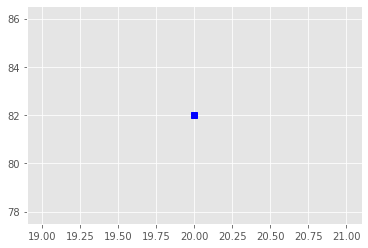

In [37]:
plt.plot(train_data[0,0],train_data[0,1],'sb')

In [38]:
def plot_data(all_blue,all_red):
    plt.scatter(all_blue[:,0],all_blue[:,1],c='b',marker='s',s=180)
    plt.scatter(all_red[:, 0], all_red[:, 1], c='r',marker='^', s=180)
    plt.xlabel('x coordinate (feature 1)')
    plt.ylabel('y coordinate (feature 2)')
    

In [39]:
labels.ravel()==0

array([False,  True, False,  True,  True,  True,  True,  True, False,
       False, False])

In [40]:
blue=train_data[labels.ravel()==0]
red=train_data[labels.ravel()==1]

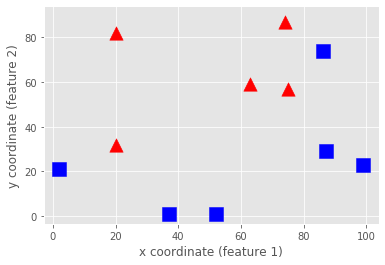

In [42]:
plot_data(blue,red)

In [48]:
knn = cv2.ml.KNearest_create()

In [50]:
knn.train(train_data,cv2.ml.ROW_SAMPLE,labels)

True

In [51]:
newcomer,_=generate_data(1)
newcomer

array([[59., 79.]], dtype=float32)

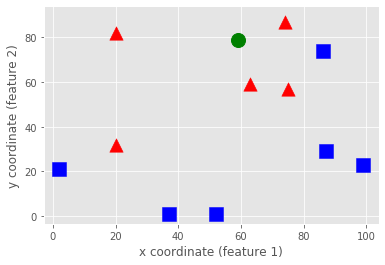

In [52]:
plot_data(blue,red)
plt.plot(newcomer[0,0],newcomer[0,1],'go',markersize='14');

In [54]:
ret,results,neighbor,dist=knn.findNearest(newcomer,1)
print("Predicted label \t",results)
print("Neighbour's label \t",neighbor)
print("Distance to Neighbour: \t",dist)

Predicted label 	 [[1.]]
Neighbour's label 	 [[1.]]
Distance to Neighbour: 	 [[289.]]


In [55]:
ret,results,neighbor,dist=knn.findNearest(newcomer,7)
print("Predicted label \t",results)
print("Neighbour's label \t",neighbor)
print("Distance to Neighbour: \t",dist)

Predicted label 	 [[1.]]
Neighbour's label 	 [[1. 1. 1. 0. 1. 0. 1.]]
Distance to Neighbour: 	 [[ 289.  416.  740.  754. 1530. 3284. 3730.]]


In [56]:
#Linear Regression Problem Solution

In [59]:
import numpy as np
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection as modsel
from sklearn import linear_model
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [61]:
boston=datasets.load_boston()

In [62]:
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [64]:
boston.data.shape

(506, 13)

In [65]:
boston.target.shape

(506,)

In [66]:
boston.feature_names.shape

(13,)

In [67]:
 linreg=linear_model.LinearRegression()

In [69]:
X_train,X_test,y_train,y_test=modsel.train_test_split(boston.data,boston.target,test_size=0.1,random_state=42)

In [70]:
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
metrics.mean_squared_error(y_train,linreg.predict(X_train))

22.7375901544866

In [72]:
linreg.score(X_train,y_train)

0.7375152736886281

In [73]:
y_pred=linreg.predict(X_test)

In [74]:
metrics.mean_squared_error(y_test,y_pred)

14.995852876582495

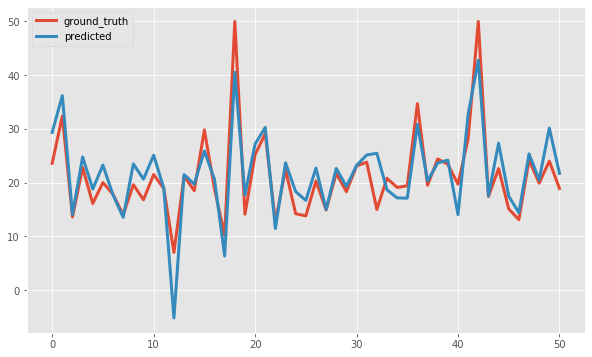

In [76]:
plt.figure(figsize=(10,6))
plt.plot(y_test,linewidth=3,label='ground_truth')
plt.plot(y_pred,linewidth=3,label='predicted')
plt.legend(loc="best")

Text(0, 0.5, 'predicted')

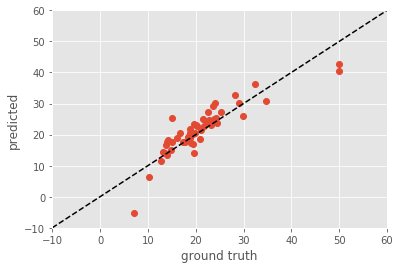

In [77]:
plt.plot(y_test,y_pred,"o")
plt.plot([-10,60],[-10,60],'k--')
plt.axis([-10,60,-10,60])
plt.xlabel('ground truth')
plt.ylabel('predicted')

Text(-5, 45, 'MSE = 14.996')

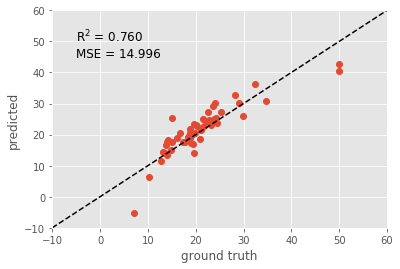

In [79]:
plt.plot(y_test,y_pred,"o")
plt.plot([-10,60],[-10,60],'k--')
plt.axis([-10,60,-10,60])
plt.xlabel('ground truth')
plt.ylabel('predicted')
scorestr=r'R$^2$ = %.3f' % linreg.score(X_test, y_test)
errstr = 'MSE = %.3f' % metrics.mean_squared_error(y_test, y_pred)
plt.text(-5, 50, scorestr, fontsize=12)
plt.text(-5, 45, errstr, fontsize=12)

In [80]:
linreg=linear_model.LinearRegression()

In [82]:
lassoreg=linear_model.Lasso()

In [87]:
ridgereg = linear_model.RidgeRegression()

AttributeError: module 'sklearn.linear_model' has no attribute 'RidgeRegression'

In [89]:
X_train,X_test,y_train,y_test=modsel.train_test_split(boston.data,boston.target,test_size=0.1,random_state=42)
lassoreg.fit(X_train,y_train)
metrics.mean_squared_error(y_train,lassoreg.predict(X_train))

27.60650506200869

In [90]:
lassoreg.score(X_train,y_train)
y_pred=lassoreg.predict(X_test)
metrics.mean_squared_error(y_test,y_pred)

18.645326946116253

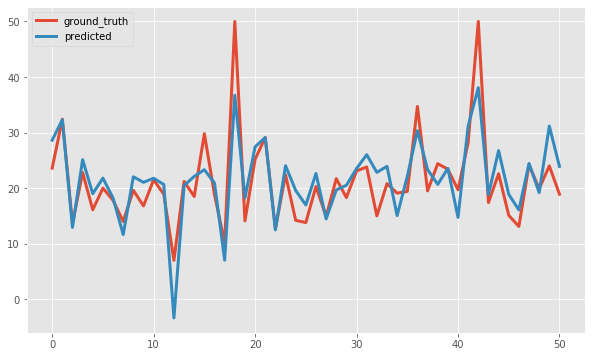

In [91]:
plt.figure(figsize=(10,6))
plt.plot(y_test,linewidth=3,label='ground_truth')
plt.plot(y_pred,linewidth=3,label='predicted')
plt.legend(loc="best")

In [92]:
#Logistic Regression

In [93]:
iris=datasets.load_iris()

In [94]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [95]:
iris.data.shape
iris.target.shape

(150,)

In [96]:
iris.data.shape

(150, 4)

In [97]:
np.unique(iris.target)

array([0, 1, 2])

In [98]:
idx=iris.target!=2
data=iris.data[idx].astype(np.float32)
target=iris.target[idx].astype(np.float32)

Text(0, 0.5, 'sepal width (cm)')

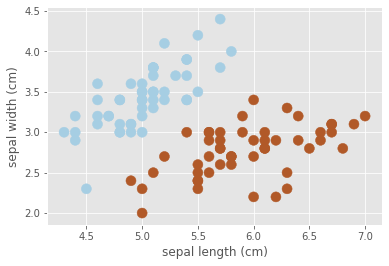

In [99]:
plt.scatter(data[:,0],data[:,1],c=target,cmap=plt.cm.Paired,s=100)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

In [102]:
X_train,X_test,y_train,y_test=modsel.train_test_split(data,target,test_size=0.1,random_state=42)

In [104]:
lr=cv2.ml.LogisticRegression_create()


In [105]:
lr.setTrainMethod(cv2.ml.LogisticRegression_MINI_BATCH)
lr.setMiniBatchSize(1)
lr.setIterations(100)
lr.train(X_train, cv2.ml.ROW_SAMPLE, y_train)

True

In [106]:
lr.get_learnt_thetas()

array([[-0.04090133, -0.01910263, -0.16340333,  0.28743777,  0.11909772]],
      dtype=float32)

In [107]:
ret, y_pred = lr.predict(X_train)

In [108]:
metrics.accuracy_score(y_train, y_pred)

1.0

In [109]:
ret, y_pred = lr.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

1.0